# Group 2 

**Step 1: Import the neccessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1: Load the dataset into python environment**

In [2]:
bnk_data=pd.read_csv("bank_transactions.csv")

**Step 2: Data insights**

In [3]:
bnk_data.head(3)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0


In [4]:
bnk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [5]:
bnk_data.shape

(1048567, 9)

In [6]:
bnk_data.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


<AxesSubplot:title={'center':'Customer Gender'}>

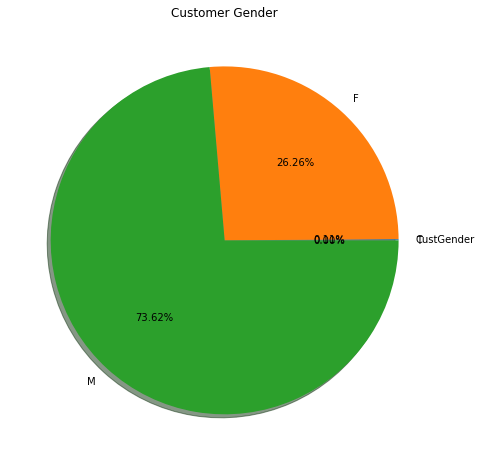

In [84]:
d1=bnk_data.groupby(['CustGender']).size()
d1.plot.pie(y='CustGender',figsize=(8, 8),autopct='%1.2f%%',title='Customer Gender',ylabel='',shadow=True)

In [7]:
bnk_data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

**Step 3: Handling Missing Data**

In [8]:
bnk_data.isna().sum()/(len(bnk_data))*100

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.323966
CustGender                 0.104905
CustLocation               0.014401
CustAccountBalance         0.225927
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [15]:
bnk_data.dtypes

TransactionID               object
CustomerID                  object
CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionDate             object
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

Data type of the missing values are obserevd to be: _object_ and _float_.
Hence assigning _Median function_ for _CustAccountBalance_ and _Mode value_ for the rest i.e _CustomerDOB_, _CustGender_ and _CustLocation_.

In [9]:
bnk_data['CustAccountBalance'] = bnk_data['CustAccountBalance'].fillna(bnk_data['CustAccountBalance'].median())

In [18]:
bnk_data['CustLocation'].mode()

0    MUMBAI
dtype: object

In [129]:
bnk_data['CustLocation'] = bnk_data['CustLocation'].fillna('MUMBAI')

In [130]:
bnk_data['CustLocation'].head()

0    3060
1    3111
2    4514
4    4846
5    2986
Name: CustLocation, dtype: int32

In [21]:
bnk_data['CustomerDOB'].mode()

0    1/1/1800
dtype: object

In [22]:
bnk_data['CustomerDOB']= bnk_data['CustomerDOB'].fillna('CustomerDOB')

In [23]:
bnk_data['CustGender'].mode()

0    M
dtype: object

In [24]:
bnk_data['CustGender']= bnk_data['CustGender'].fillna('CustGender')

In [25]:
bnk_data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

**Step 4: Check and handling outliers**

TransactionAmount (INR) : Outliers

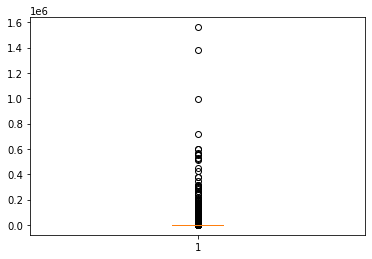

In [60]:
plt.boxplot(bnk_data['TransactionAmount (INR)'])
plt.show()

In [61]:
Q1 = np.percentile(bnk_data['CustAccountBalance'],25,interpolation='midpoint')
Q2 = np.percentile(bnk_data['CustAccountBalance'],50,interpolation='midpoint')
Q3 = np.percentile(bnk_data['CustAccountBalance'],75,interpolation='midpoint')
print('Q1: ',Q1,'\nQ2: ',Q2,'\nQ3: ',Q3)

Q1:  3629.495 
Q2:  12470.76 
Q3:  32986.61


In [62]:
IQR = Q3 - Q1
print('IQR: ',IQR)

IQR:  29357.115


In [63]:
l_lim = Q1-1.5*IQR
u_lim = Q3+1.5*IQR
print("Lower limit is : ",l_lim)
print("Upper limit is : ",u_lim)

Lower limit is :  -40406.1775
Upper limit is :  77022.2825


In [64]:
outliers = []
for i in bnk_data['CustAccountBalance']:
  if((i>u_lim)or(i<l_lim)):
    outliers.append(i)
print("Outliers in CustAccountBalance are : ",outliers)

Outliers in CustAccountBalance are :  [95075.54, 77495.15, 123781.9, 113238.74, 87884.2, 134698.04, 121767.71, 100371.41, 98097.5, 77587.52, 116592.57, 87839.68, 122636.69, 116584.57, 133203.58, 132699.5, 85722.72, 108913.62, 121747.74, 121821.27, 78122.46, 134969.65, 100780.55, 78479.33, 82130.58, 96798.63, 111181.72, 88207.21, 103118.04, 92594.19, 112819.01, 85674.55, 84084.13, 98395.61, 99466.74, 77624.68, 103551.87, 98044.88, 95544.02, 92844.7, 96276.9, 98203.35, 126023.26, 100336.79, 92316.6, 98395.61, 111071.61, 107406.89, 93654.64, 79291.13, 123036.55, 91348.86, 103023.35, 121852.78, 78255.57, 89055.34, 114339.73, 123607.92, 92924.88, 116788.08, 116255.65, 107338.47, 100982.2, 99260.38, 110091.54, 132104.38, 111317.07, 103856.35, 84718.34, 121060.05, 115715.85, 135701.38, 110341.58, 129490.6, 88425.71, 77726.33, 104389.33, 129290.36, 109362.18, 81691.41, 77948.53, 128915.4, 132201.64, 107963.73, 126359.35, 91859.49, 121896.15, 117061.27, 85135.36, 111915.53, 81019.33, 81427.22, 

In [65]:
n1 = bnk_data['CustAccountBalance']>u_lim
outlier_up = bnk_data.loc[n1].index
n2 = bnk_data['CustAccountBalance']<l_lim
outlier_low = bnk_data.loc[n2].index

In [66]:
n1.sum()

73382

In [67]:
n2.sum()

0

In [68]:
bnk_data.drop(outlier_up, inplace=True)

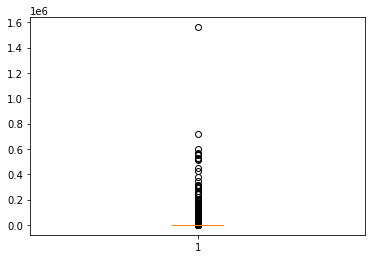

In [69]:
plt.boxplot(bnk_data['TransactionAmount (INR)'])
plt.show()

**Step 5: Scaling (Target: TransactionTime)**

In [144]:
from sklearn.preprocessing import StandardScaler
scaled = scaler.fit_transform(bnk_data)
print(scaled)

ValueError: could not convert string to float: '10/1/94'